In [14]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
# 数据加载
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
# data = pd.read_csv('./train.csv')
import warnings 
warnings.filterwarnings("ignore")

In [15]:
# 使用平均年龄来填充年龄中的nan值
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
# 使用票价的均值填充票价中的nan值
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

print(train_data['Embarked'].value_counts())
# 使用登录最多的港口来填充登录港口的nan值
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S',inplace=True)
# 特征选择
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train_data[features]
train_labels = train_data['Survived']
test_features = test_data[features]
# print('特征值')
# print(train_features)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [16]:
## IDS

dvec=DictVectorizer(sparse=False)
train_features=dvec.fit_transform(train_features.to_dict(orient='record'))
test_features=dvec.transform(test_features.to_dict(orient='record'))
print(dvec.feature_names_)

['Age', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Fare', 'Parch', 'Pclass', 'Sex=female', 'Sex=male', 'SibSp']


XGBoost score准确率为 0.8474


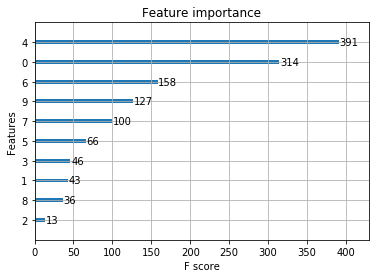

In [20]:
## XGBoost

# 构造XGBoost决策树
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit

dtrain = xgb.DMatrix(pd.DataFrame(train_features), label = train_labels)
dtest = xgb.DMatrix(pd.DataFrame(test_features))

# 参数设置

params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth':4,
    'lambda':10,
    'subsample':0.75,
    'colsample_bytree':0.75,
    'min_child_weight':2,
    'eta': 0.025,
    'seed':0,
    'nthread':8,
     'silent':1}
num_round = 150
bst = xgb.train(params, dtrain, num_round)
train_preds = bst.predict(dtrain)
train_preds = (train_preds >= 0.5) * 1 

# 得到test的预测结果
test_preds = bst.predict(dtest)

# 得到决策树准确率(基于训练集)
acc_xgb = round(accuracy_score(train_preds, train_labels.values), 6)
print(u'XGBoost score准确率为 %.4lf' % acc_xgb)

from xgboost import plot_importance #显示特征重要性
from matplotlib import  pyplot
plot_importance(bst)#打印重要程度结果。
pyplot.show()